In [3]:
import numpy as np
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.gridspec import GridSpec
from simi.args import qubit_args

from simi.Hamiltonian_helper import lorentzian

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 12,
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "axes.linewidth": 0.8,
    "lines.linewidth": 1.2,
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "text.usetex": False,  # set to True if LaTeX is available
})

def prl_ticks(ax):
    ax.tick_params(direction='in', length=3, width=0.8, top=True, right=True)
    
    
us = 1e-6


T1: 30.00 us
T2: 15.00 us
T2 limit: 21.22 kHz
broadening condition:
28.284271247461906 kHz


In [4]:
qubit_args['pulse_length'] = 50*us
qubit_args['cutoff'] = 1e-2

t = np.linspace(-300*us, 300*us, int(1e5))


def cutoff_signal(x, func, args):
    return func(x, *args)*(np.heaviside(x + qubit_args['pulse_length'], 0.5) - np.heaviside(x - qubit_args['pulse_length'], 0.5))


def echo_signal(x, f, args):
    return f(x, *args)*(2*np.heaviside(x, 0.5)-1)

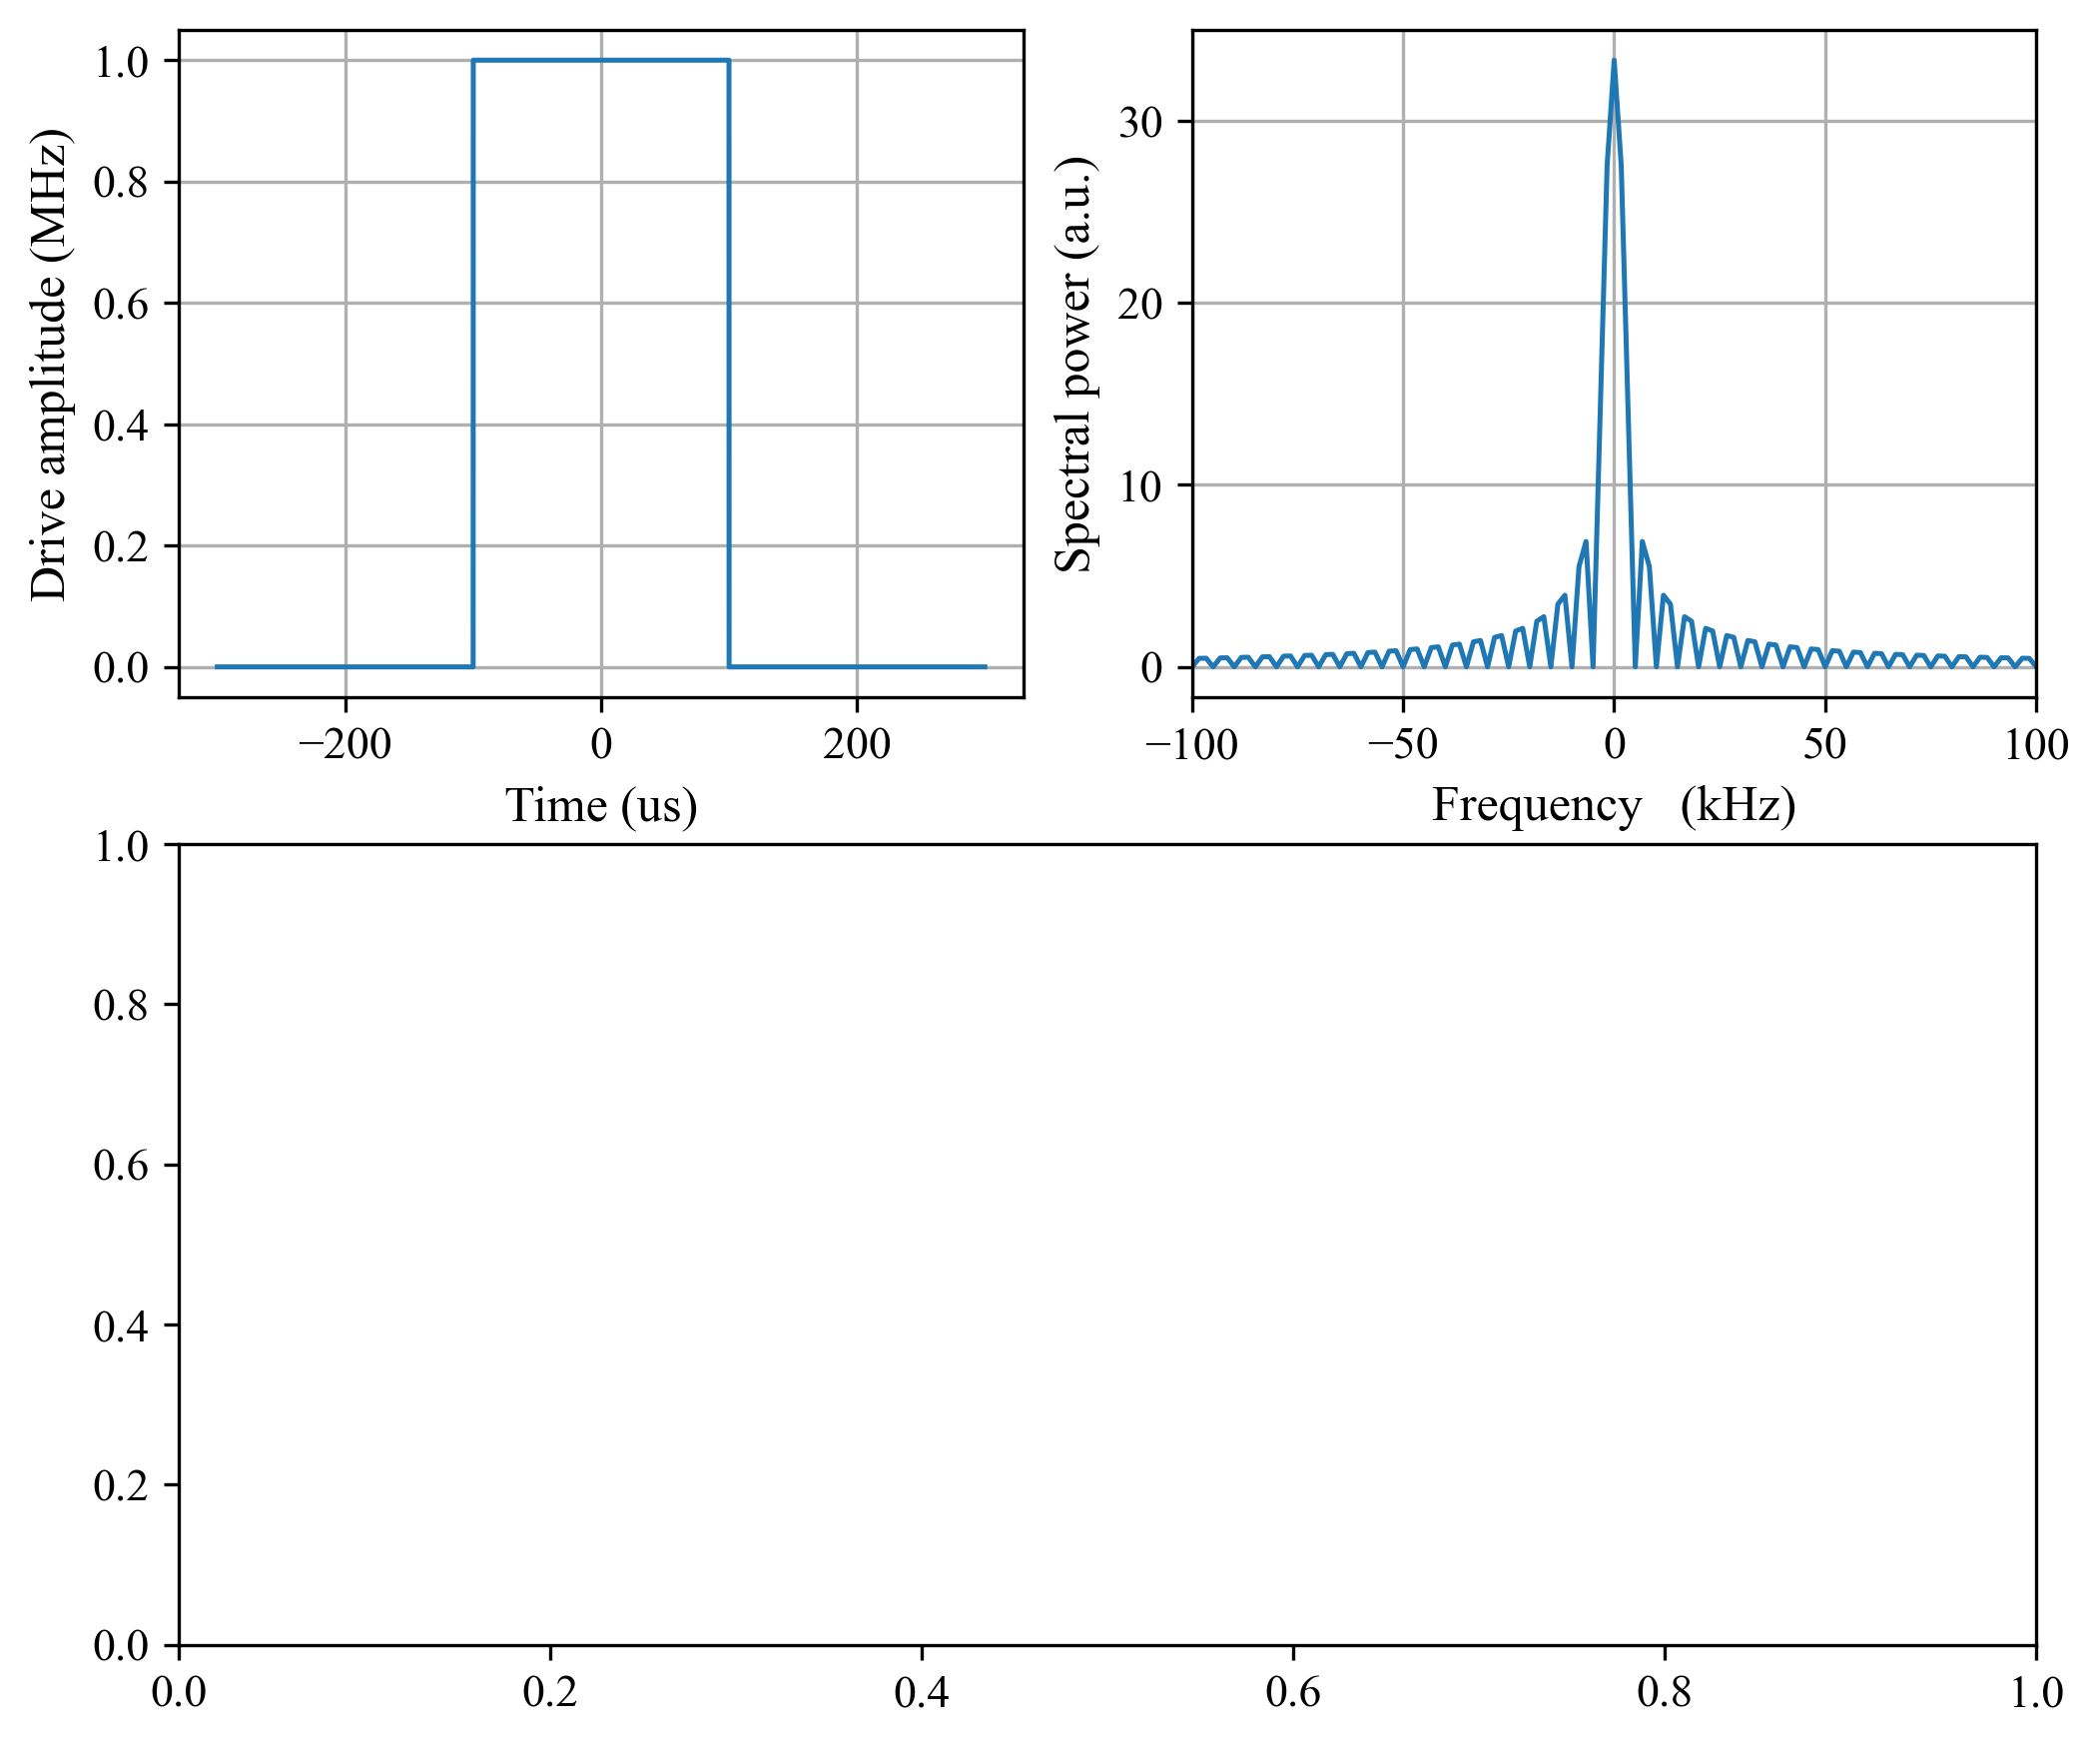

In [8]:

y = cutoff_signal(t, lorentzian, (qubit_args,))



def plot_lorentzian(ax, y):
    ax.plot(t/1e-6, y)
    # ax.set_xlim(-3, 3)
    # ax.set_ylim(-1.5, 1.5)

    ax.set_xlabel("Time (us)")
    ax.set_ylabel("Drive amplitude (MHz)")
    ax.grid()


def plot__fft_lorentzian(ax, y):
    freqs = np.fft.fftshift(np.fft.fftfreq(len(t), d=(t[1] - t[0])))
    y_fft = np.fft.fftshift(np.fft.fft(np.fft.fftshift(y)))/1000
    ax.plot(freqs/1e3, np.abs(y_fft))
    ax.set_xlabel("Frequency   (kHz)")
    ax.set_ylabel("Spectral power (a.u.)")
    ax.set_xlim(-100, 100)
    # ax.set_ylim(0, 10)
    ax.grid()




# fig, axs = plt.subplots(2, 2, figsize=(9, 8))
fig = plt.figure(figsize=(8, 7))

gs = GridSpec(2, 2, figure=fig, height_ratios=[1, 1.2])

# Top row: two small plots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Bottom row: one long plot spanning both columns
ax3 = fig.add_subplot(gs[1, :])


plot_lorentzian(ax1, y)
plot__fft_lorentzian(ax2, y)


# cutoff = 1e-6
# y_cutoff = lorentzian_cutoff(t,gamma, cutoff)
# y_echo = echo_signal(t, lorentzian_cutoff, (gamma, cutoff))



# plot_lorentzian([ax1,ax2], y_echo)

# cutoff = 2e-6
# y_cutoff = lorentzian_cutoff(t,gamma=gamma, cutoff=cutoff)
# y_echo = echo_signal(t, lorentzian_cutoff, (gamma, cutoff))



# plot_lorentzian([ax1, ax2], y_echo)


# cutoff = 5e-6
# y_cutoff = lorentzian_cutoff(t, gamma=gamma, cutoff=cutoff)
# y_echo = echo_signal(t, lorentzian_cutoff, (gamma, cutoff))

# from scriptos.fwhm_vs_amp import find_fwhm_vec_vs_rabi

# find_fwhm_vec_vs_rabi(ax3)

# plot_lorentzian(axs[0], y_echo)



# ax[1].plot(freqs, np.abs(y_fft), label='Without Echo')
# ax[1].pl  ot(freqs, np.abs(y_echo_fft), label='With Echo', linestyle='--')
# ax[1].legend()
# ax[1].set_xlabel("Frequency   (Hz)")
# ax[1].set_ylabel("Amplitude")
# ax[1].set_xlim(-5, 5)

# ax[1].grid()
# plt.tight_layout()
plt.savefig("notebooks/fourier_transform_with_echo.png", dpi=300)
plt.show()


Length = 0/200


Length = 1/200
Length = 2/200
Length = 3/200
Length = 4/200
Length = 5/200
Length = 6/200
Length = 7/200
Length = 8/200
Length = 9/200
Length = 10/200
Length = 11/200
Length = 12/200
Length = 13/200
Length = 14/200
Length = 15/200
Length = 16/200
Length = 17/200
Length = 18/200
Length = 19/200
Length = 20/200
Length = 21/200
Length = 22/200
Length = 23/200
Length = 24/200
Length = 25/200
Length = 26/200
Length = 27/200
Length = 28/200
Length = 29/200
Length = 30/200
Length = 31/200
Length = 32/200
Length = 33/200
Length = 34/200
Length = 35/200
Length = 36/200
Length = 37/200
Length = 38/200
Length = 39/200
Length = 40/200
Length = 41/200
Length = 42/200
Length = 43/200
Length = 44/200
Length = 45/200
Length = 46/200
Length = 47/200
Length = 48/200
Length = 49/200
Length = 50/200
Length = 51/200
Length = 52/200
Length = 53/200
Length = 54/200
Length = 55/200
Length = 56/200
Length = 57/200
Length = 58/200
Length = 59/200
Length = 60/200
Length = 61/200
Length = 62/200
Length = 63/200
L

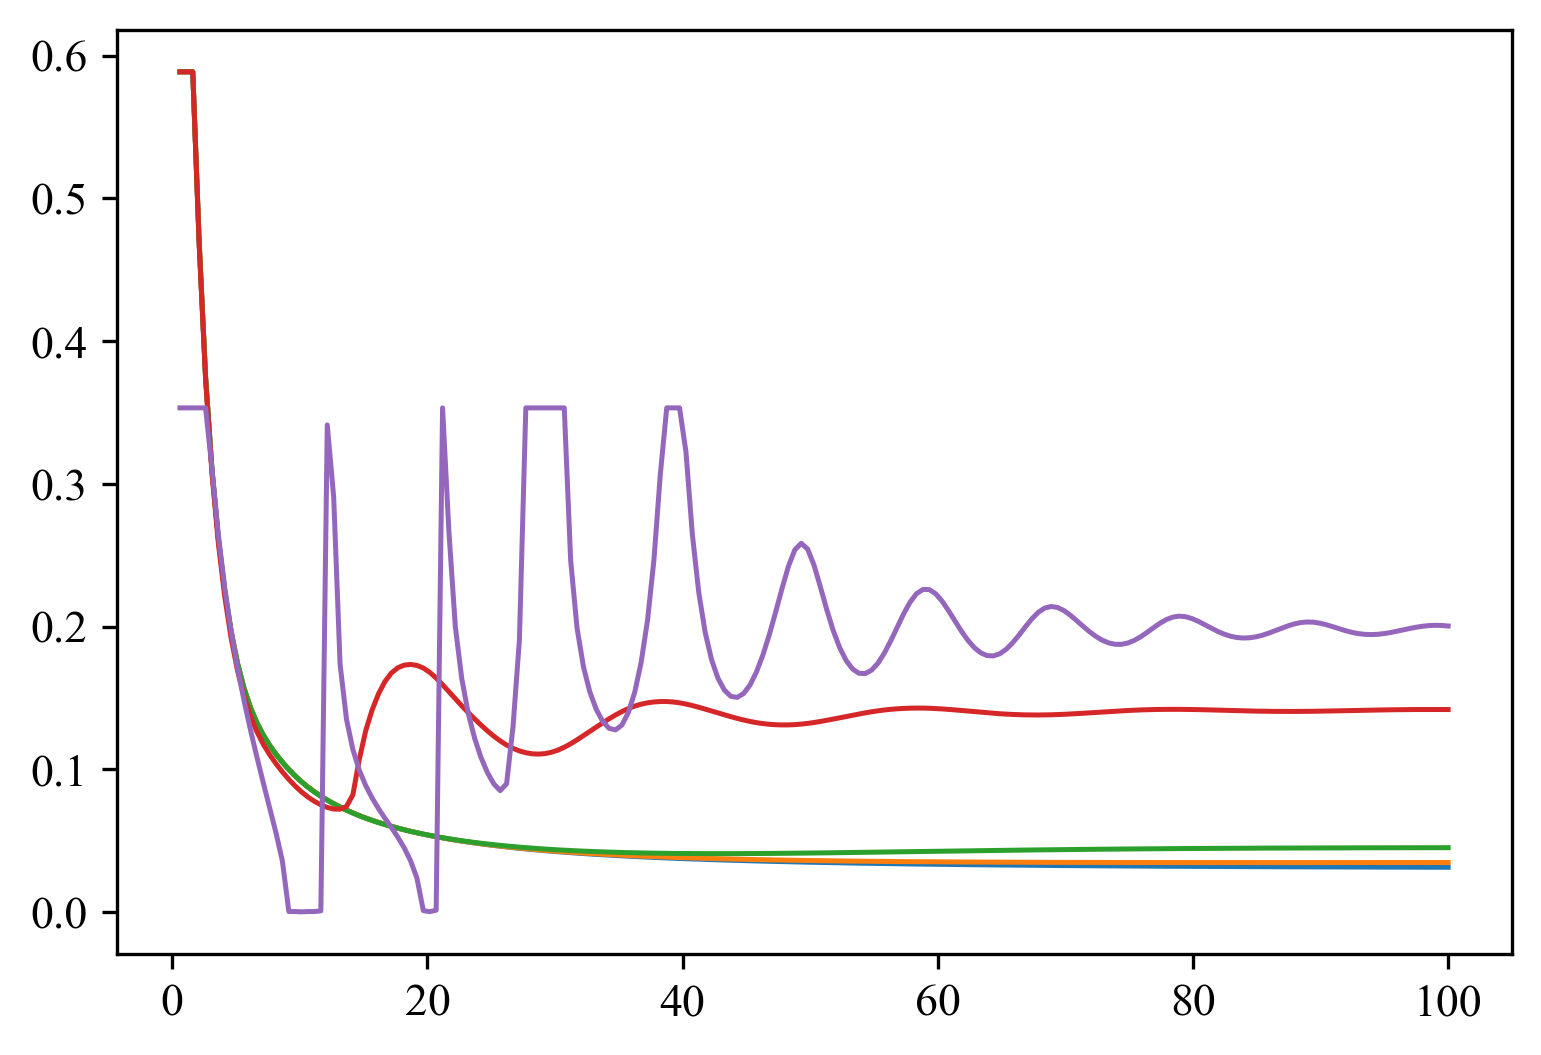

In [7]:
from scriptos.spectroscopy_vs_pulse_length import return_fwhms
from numpy import pi
from simi.args import MHz, us

plt.figure(figsize=(6, 4))
length_points = 200
pulse_length = 100*us

amps = [2 * pi * x * MHz for x in [0.001,0.005,0.01,0.05,0.1]]
fwhms_matrix = []
snrs_matrix = []
for amp in amps:
    lengths, fwhms, snrs = return_fwhms(amp, length_points, pulse_length)
    plt.plot(lengths/1e-6, fwhms/MHz/2/pi, '-', label=f'{amp/2/pi/MHz} MHz')
    fwhms_matrix.append(fwhms)
    snrs_matrix.append(snrs)




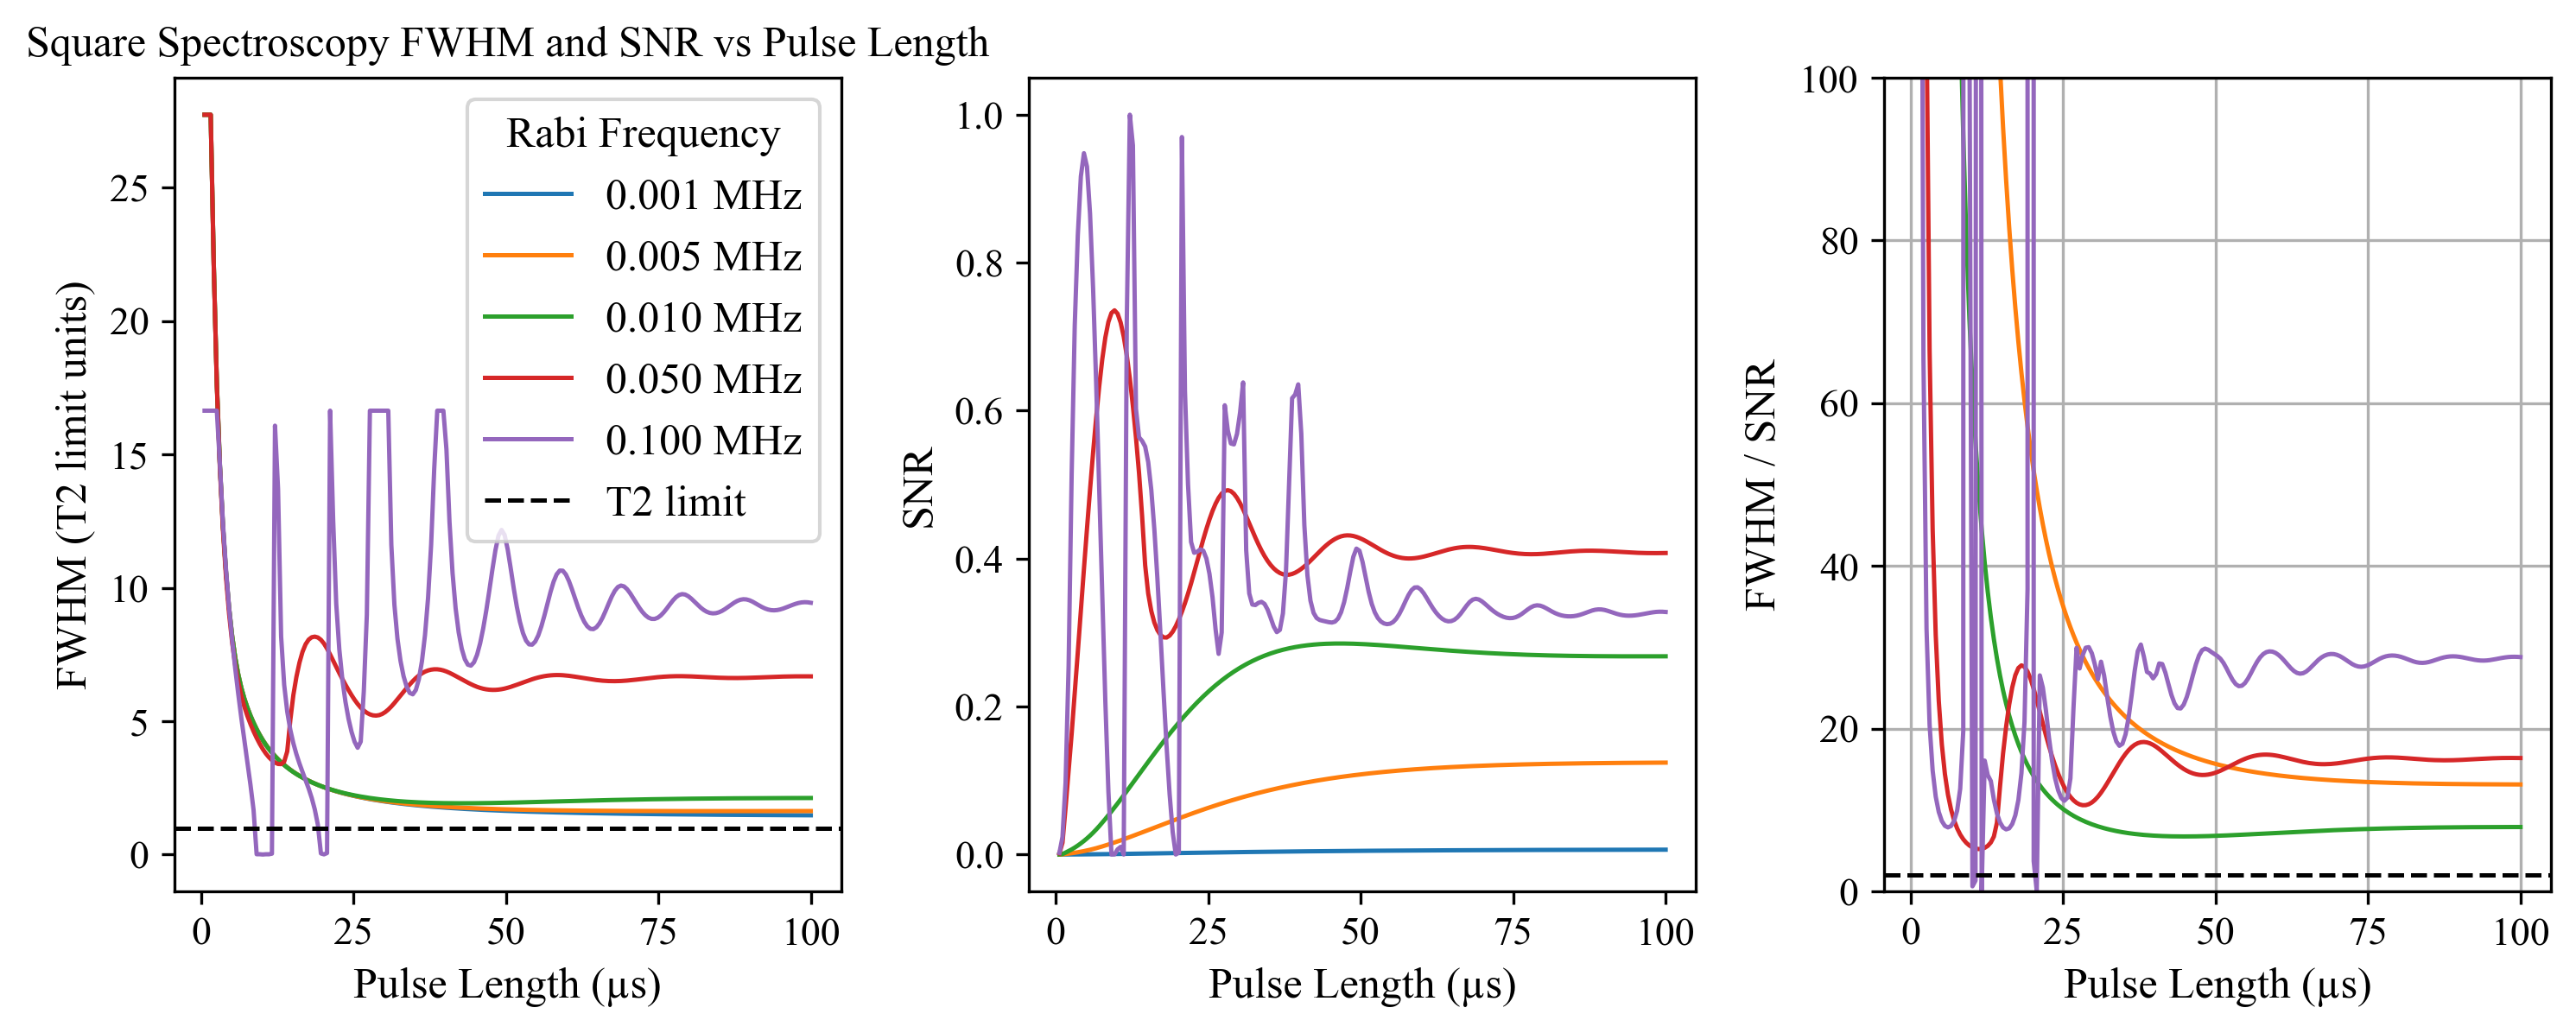

In [ ]:
indexs = range(0,5)

fig, ax = plt.subplots(1, 3, figsize=(10, 4))

from simi.args import T2_limit



for i in indexs:
    ax[0].plot(lengths/1e-6, fwhms_matrix[i]/T2_limit/2/pi, '-',label=f'{amps[i]/2/pi/MHz:.3f} MHz')
    ax[1].plot(lengths/1e-6, snrs_matrix[i], '-',label=f'{amps[i]/2/pi/MHz:.3f} MHz')
    ax[2].plot(lengths/1e-6, fwhms_matrix[i]/snrs_matrix[i]/2/pi/T2_limit, '-',label=f'{amps[i]/2/pi/MHz:.3f} MHz')
ax[0].axhline(1, color='k', linestyle='--', label='T2 limit')
ax[2].axhline(2, color='k', linestyle='--', label='T2 limit')
ax[0].set_ylabel("FWHM (T2 limit units)")
ax[0].set_xlabel("Pulse Length (µs)")
ax[1].set_xlabel("Pulse Length (µs)")   
ax[1].set_ylabel("SNR")
ax[0].legend(title="Rabi Frequency")
ax[2].set_ylim([0,100])
ax[2].set_xlabel("Pulse Length (µs)")
ax[2].set_ylabel("FWHM / SNR")
plt.grid()
plt.tight_layout()
ax[0].set_title("Square Spectroscopy FWHM and SNR vs Pulse Length")
plt.show()



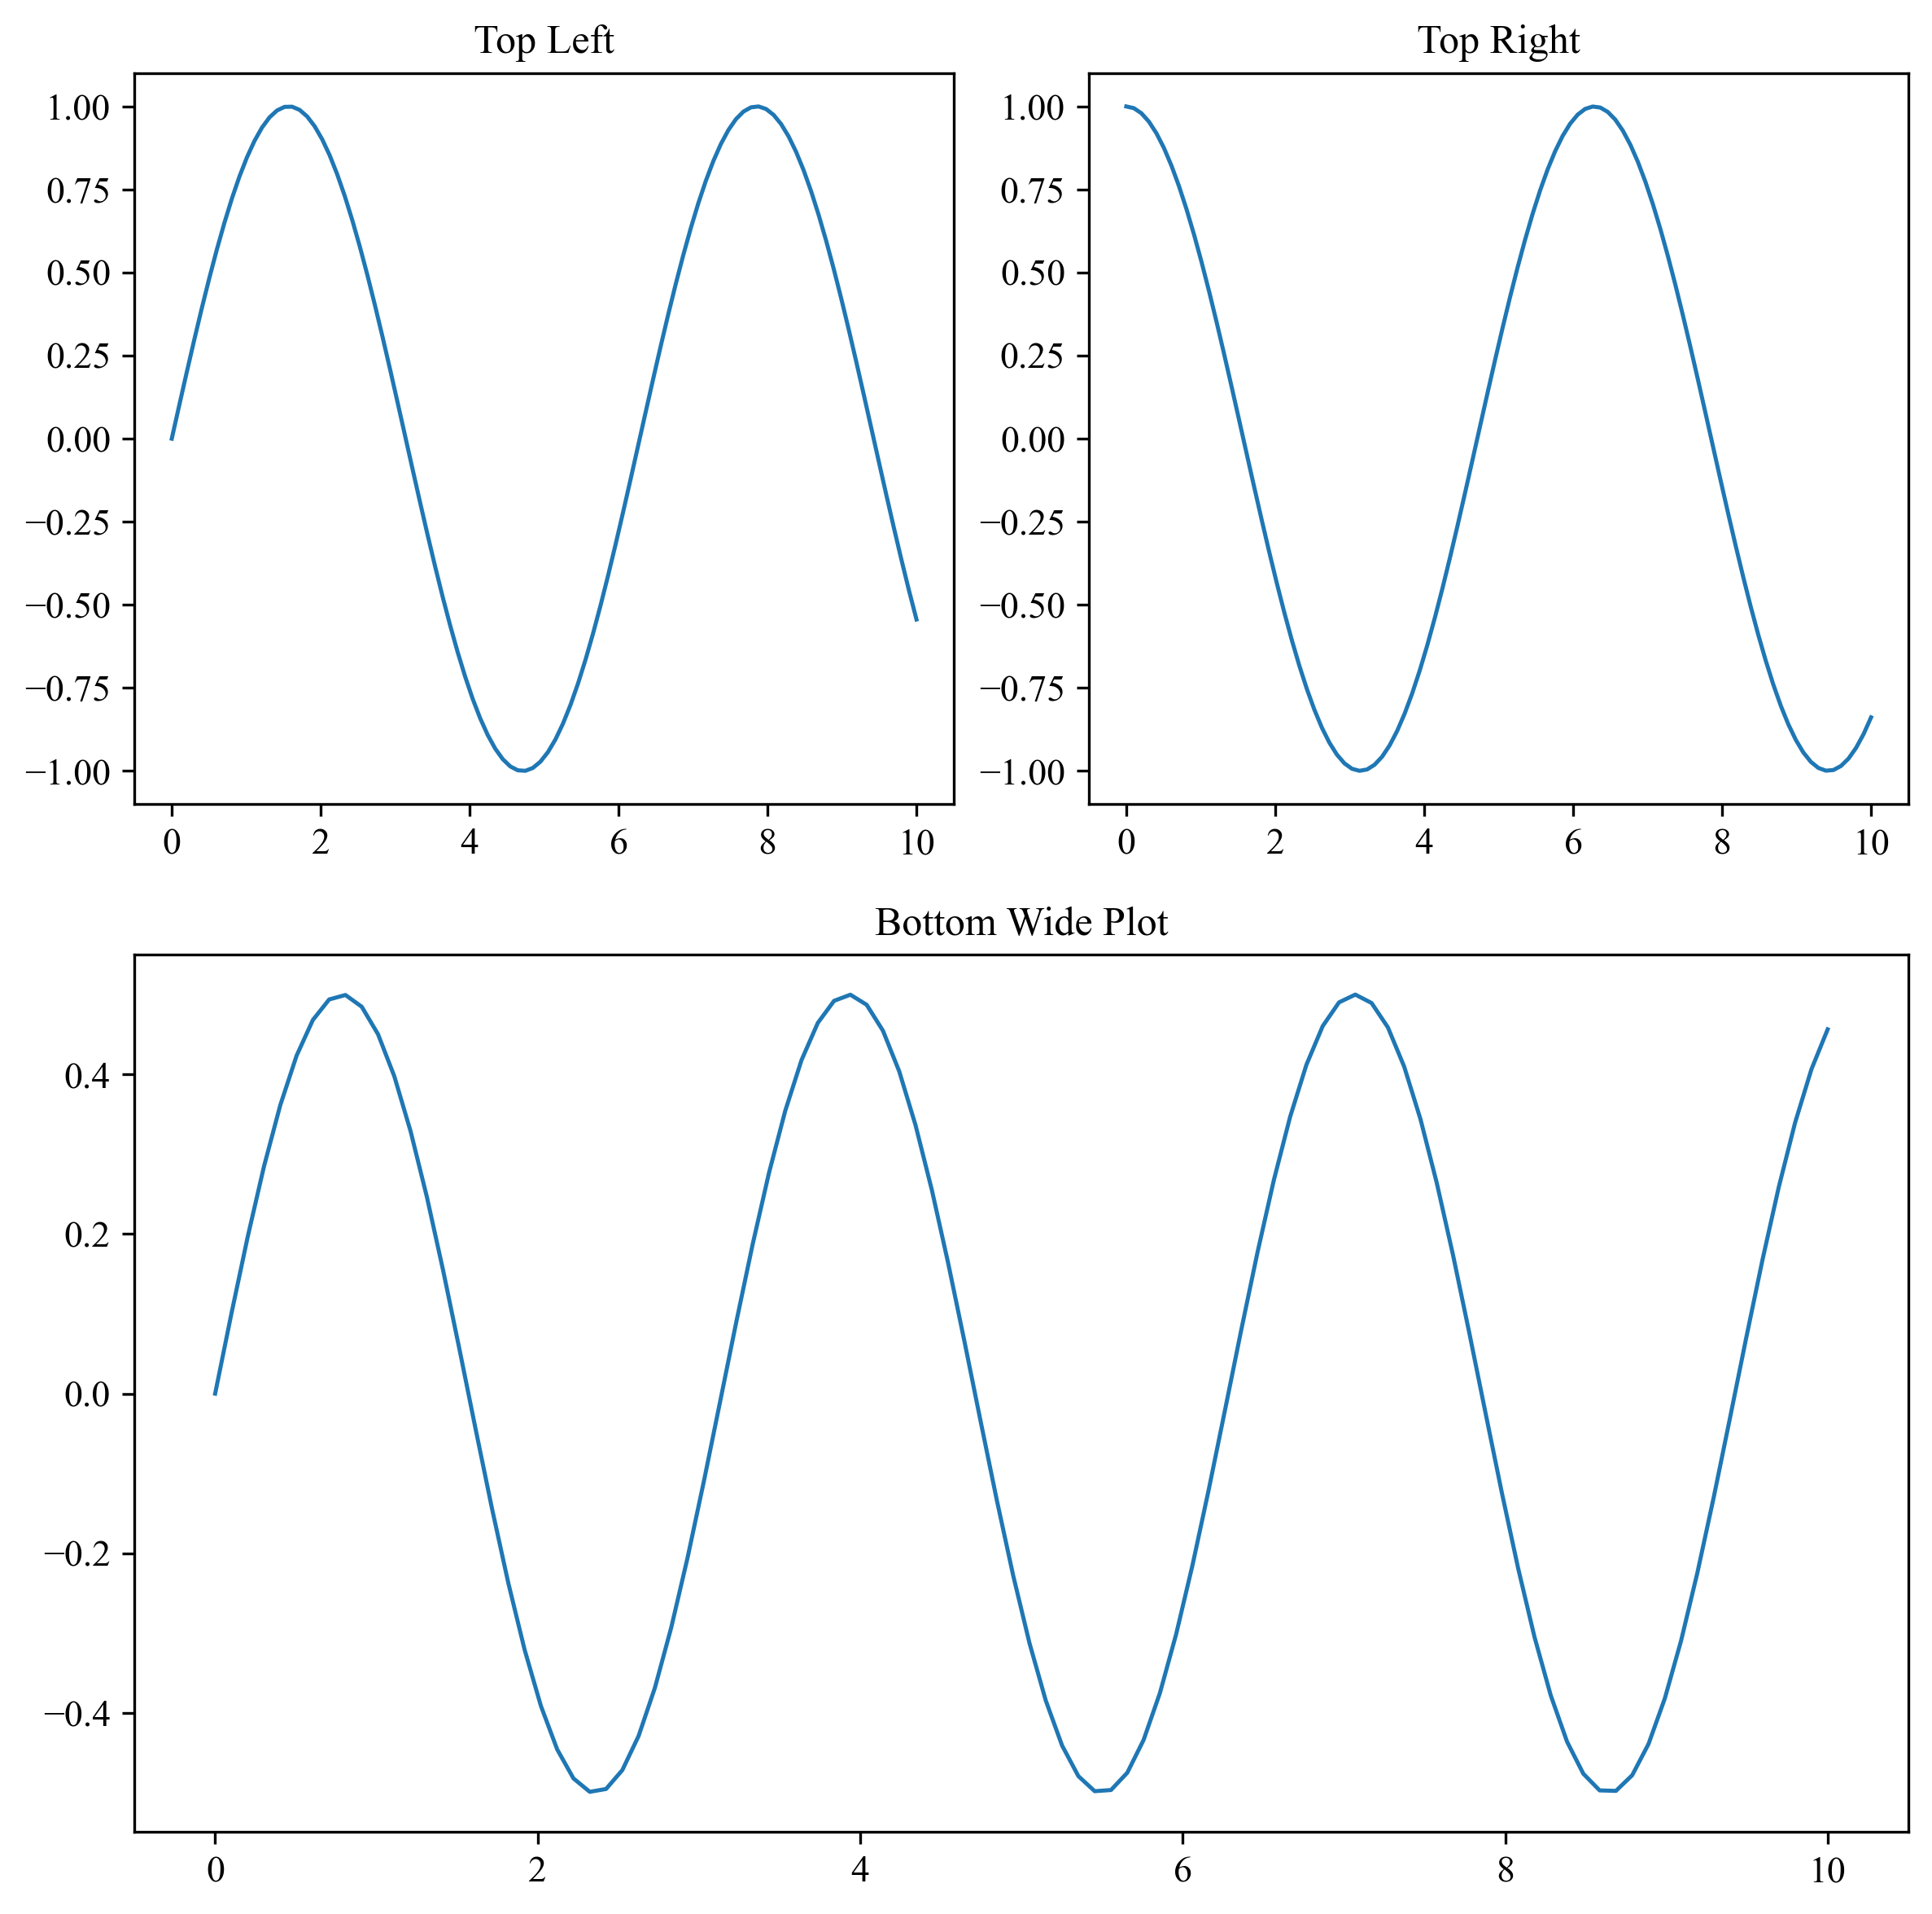

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Dummy data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.cos(x)

# Create figure
fig = plt.figure(figsize=(8, 8))
gs = GridSpec(2, 2, figure=fig, height_ratios=[1, 1.2])

# Top row: two small plots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Bottom row: one long plot spanning both columns
ax3 = fig.add_subplot(gs[1, :])

# Plot data
ax1.plot(x, y1)
ax1.set_title("Top Left")

ax2.plot(x, y2)
ax2.set_title("Top Right")

ax3.plot(x, y3)
ax3.set_title("Bottom Wide Plot")

plt.tight_layout()
plt.show()